# Exercise sheet 5
## Exercise 2 - Exploring model complexity

Load again the data from the Howell study, using all rows (no selection on age).

1. Fit a linear trend to these data, comment on your findings and discuss whether the model of H vs. W could be improved using plots as basis for discussion.
2. Use different models of your choosing and using map, investigate on whether you can identify one model that fits the data better than in (1). Use the range of diagnosis tools (plots, vcov, precis/summary) as a basis for discussion.
3. Explore on how the model performs out of sample using counterfactual plots. Have you found a model that reproduces well the behaviour of the human body?

In [93]:
library(rethinking)
data(Howell1)
dat <- Howell1

### Considering the effect of gender on weight

Lets first investigate the effect of gender on weight. We start by looking at the data.

In [80]:
d <- data.frame(list(weight = dat$weight, male = dat$male))
mean(d$weight[d$male == 1])
mean(d$weight[d$male == 0])

[1] 38.02624

[1] 33.4475

We see that there is a difference in the data. Lets now construct a model to investigate the difference further.

In [81]:
# Standardize the weight data
d$weight <- scale(d$weight)

In [82]:
# Build a model of a simple offset over all and then one offset that is only sensitive to males.
model <- map2stan(
    alist(
        weight ~ dnorm(mu, sigma),
        mu <- a + a_male * male,
        c(a, a_male) ~ dnorm(0, 1),
        sigma ~ dcauchy(0, 1)
    ),
    data = d,
    constraints = list(sigma = "lower=0"),
    cores = 7, chains = 7
)

Warning message in map2stan(alist(weight ~ dnorm(mu, sigma), mu <- a + a_male * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning message in map2stan(alist(weight ~ dnorm(mu, sigma), mu <- a + a_male * :
"Stripping scale attributes from variable weight"
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc755463a4.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc755463a4.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically u

Running MCMC with 7 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc755463a4.stan', line 20, column 4 to column 34)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc755463a4.stan', line 20, column 4 to column 34)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc755463a4.stan', line 20, column 4 to column 34)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc755463a4.stan', line 20, column 4 to column 34)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 5 Iteration:  

Computing WAIC



In [83]:
precis(model)

544 vector or matrix parameters hidden. Use depth=2 to show them.



,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.1453619,0.05921608,-0.2413264,-0.05299327,3447.389,1.001878
a_male,0.3093652,0.08529938,0.1726227,0.44386185,3538.097,1.000919
sigma,0.9907215,0.02989790,0.9435556,1.03933330,4789.052,1.000336


[ 1000 / 1000 ]


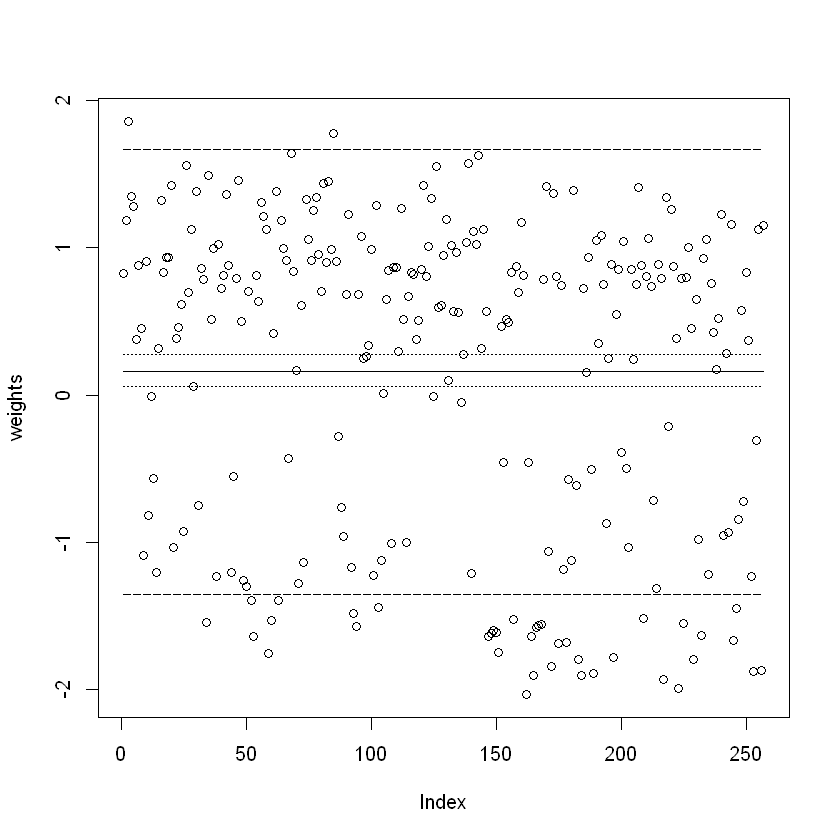

In [84]:
weights <- d$weight[d$male == 1]
plot(weights)

post <- extract.samples(model)
mu <- post$a + post$a_male

mu_mean <- mean(mu)
mu_HPDI <- HPDI(mu, prob = 0.92)

lines(1:length(weights), rep(mu_mean, times = length(weights)))
lines(1:length(weights), rep(mu_HPDI[1], times = length(weights)), lty = 3)
lines(1:length(weights), rep(mu_HPDI[2], times = length(weights)), lty = 3)

weight_sim <- sim(model, data = list(male = 1))
weight_HPDI <- HPDI(weight_sim)

lines(1:length(weights), rep(weight_HPDI[1], times = length(weights)), lty = 5)
lines(1:length(weights), rep(weight_HPDI[2], times = length(weights)), lty = 5)

[ 1000 / 1000 ]


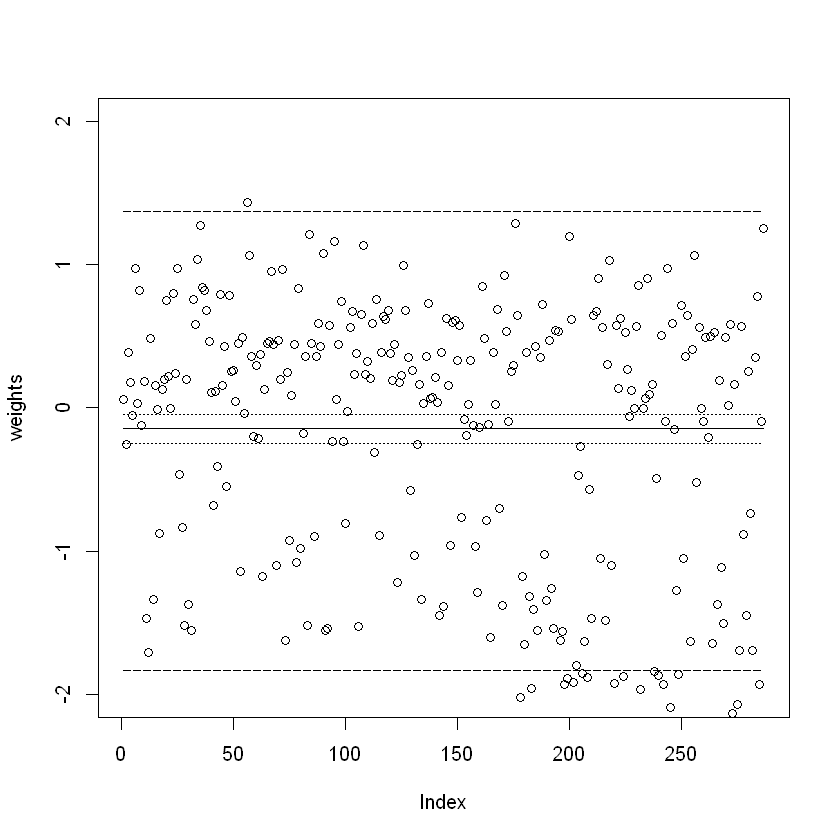

In [85]:
weights <- d$weight[d$male == 0]
plot(weights, ylim = c(-2, 2))

post <- extract.samples(model)
mu <- post$a #+ post$a_male

mu_mean <- mean(mu)
mu_HPDI <- HPDI(mu, prob = 0.92)

lines(1:length(weights), rep(mu_mean, times = length(weights)))
lines(1:length(weights), rep(mu_HPDI[1], times = length(weights)), lty = 3)
lines(1:length(weights), rep(mu_HPDI[2], times = length(weights)), lty = 3)

weight_sim <- sim(model, data = list(male = 0))
weight_HPDI <- HPDI(weight_sim)

lines(1:length(weights), rep(weight_HPDI[1], times = length(weights)), lty = 5)
lines(1:length(weights), rep(weight_HPDI[2], times = length(weights)), lty = 5)

We see that for most of the data seems to agree with the means and credible intervals. For highter indices there is some notable divergence to below the HPDI lower border, which means that there are some unaccounted for predictors (such as age). Notably, we get that there is a significant difference of the weight from the gender and that the females were on average lighter than the males.

### Considering the effect of weight on height

We first investigate the general relation between the two factors.

In [97]:
# We build a linear model for the relationship
# Build a model of a simple offset over all and then one offset that is only sensitive to males.
model2 <- map2stan(
    alist(
        height ~ dnorm(mu, sigma),
        mu <- a + b_weight * weight,
        a ~ dnorm(0, 2),
        b_weight ~ dnorm(0, 2),
        sigma ~ dcauchy(0, 2)
    ),
    data = d,
    constraints = list(sigma = "lower=0"),
    cores = 7, chains = 7
)

Warning message in map2stan(alist(height ~ dnorm(mu, sigma), mu <- a + b_weight * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning message in map2stan(alist(height ~ dnorm(mu, sigma), mu <- a + b_weight * :
"Stripping scale attributes from variable weight"
Warning message in map2stan(alist(height ~ dnorm(mu, sigma), mu <- a + b_weight * :
"Stripping scale attributes from variable height"
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc36b4531c.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc36b4531c.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is

Running MCMC with 7 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc36b4531c.stan', line 20, column 4 to column 34)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc36b4531c.stan', line 20, column 4 to column 34)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  

Computing WAIC



[ 1000 / 1000 ]


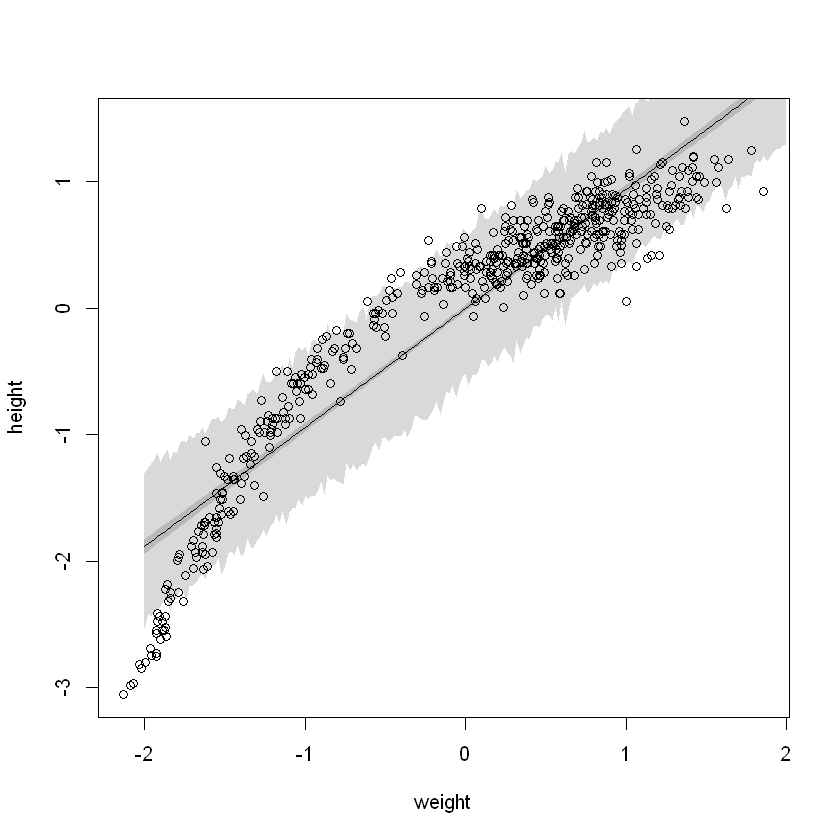

In [90]:
post2 <- extract.samples(model2)
mu_link2 <- function (weight) post2$a + post2$b_weight * weight
weight_seq <- seq(from = -2, to = 2, by = 0.02)

plot(height ~ weight, data = d)

mu <- sapply(weight_seq, mu_link2)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.92)

lines(weight_seq, mu_mean)
shade(mu_HPDI, weight_seq)

height_sim <- sim(model2, data = list(weight = weight_seq))
height_HPDI <- apply(height_sim, 2, HPDI, prob = 0.92)

shade(height_HPDI, weight_seq)

As we can see, while the data fits well in the HPDI of the model, it overestimates the mean for low weights and underestimates it for highter weights, while the slope for the highest cluster is very much not correct. This gives us the incentive to use a log model.

In [99]:
d$logweight <- log(dat$weight)
d

weight,male,height,logweight
"<dbl[,1]>",<int>,"<dbl[,1]>",<dbl>
0.829868948,1,0.48913791,3.867561
0.059459088,0,0.05203900,3.596923
-0.254482930,0,-0.06298703,3.461503
1.184257483,1,0.67317956,3.971082
0.384957254,0,0.25908585,3.720302
1.860292135,1,0.92623683,4.143017
0.178872616,0,0.39711709,3.643973
1.349895603,1,1.11027848,4.016022
-0.050324317,0,0.35110668,3.551624


In [98]:
# Log model
model3 <- map2stan(
    alist(
        height ~ dnorm(mu, sigma),
        mu <- a + b_weight * logweight,
        a ~ dnorm(0, 2),
        b_weight ~ dnorm(0, 2),
        sigma ~ dcauchy(0, 2)
    ),
    data = d,
    constraints = list(sigma = "lower=0"),
    cores = 7, chains = 7
)

Warning message in map2stan(alist(height ~ dnorm(mu, sigma), mu <- a + b_weight * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning message in map2stan(alist(height ~ dnorm(mu, sigma), mu <- a + b_weight * :
"Stripping scale attributes from variable weight"
Warning message in map2stan(alist(height ~ dnorm(mu, sigma), mu <- a + b_weight * :
"Stripping scale attributes from variable height"
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc6a591a44.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc6a591a44.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is

Running MCMC with 7 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc6a591a44.stan', line 20, column 4 to column 34)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc6a591a44.stan', line 20, column 4 to column 34)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc6a591a44.stan', line 20, column 4 to column 34)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc6a591a44.stan', line 20, column 4 to column 34)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/immal/AppData/Local/Temp/RtmpwXqVqA/model-33bc6a591a44.stan', line 20, column 4 to column 34)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 5 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 5 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 5 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 5 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 6 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 6 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 6 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 7 Iteration:  

Computing WAIC



[ 1000 / 1000 ]


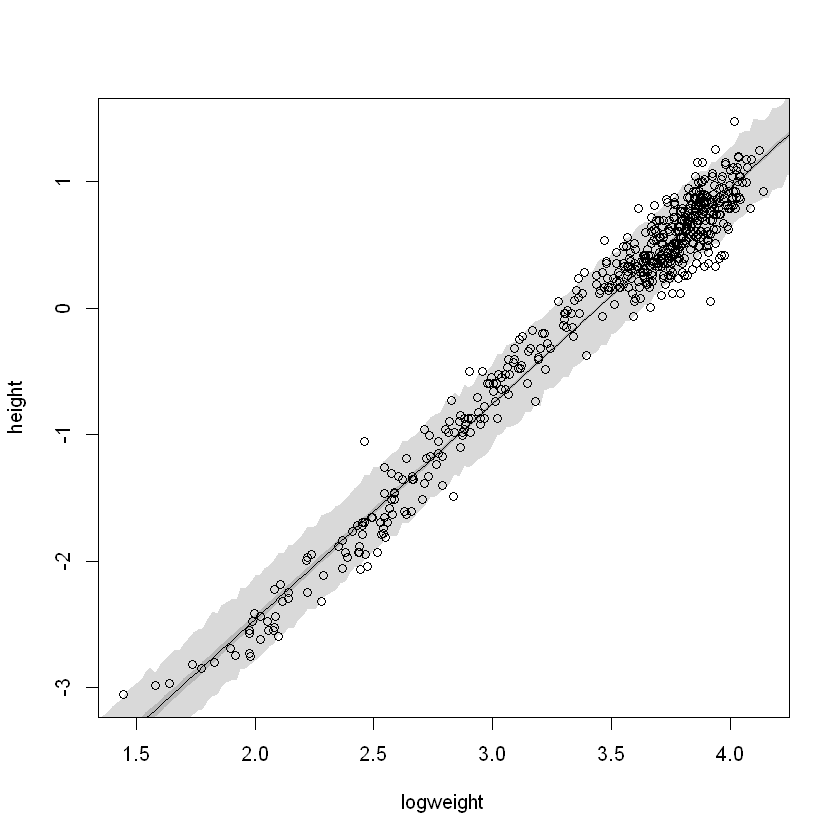

In [102]:
post3 <- extract.samples(model3)
mu_link3 <- function (logweight) post3$a + post3$b_weight * logweight
logweight_seq <- seq(from = 1, to = 5, by = 0.02)

plot(height ~ logweight, data = d)

mu <- sapply(logweight_seq, mu_link3)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.92)

lines(logweight_seq, mu_mean)
shade(mu_HPDI, logweight_seq)

height_sim <- sim(model3, data = list(logweight = logweight_seq))
height_HPDI <- apply(height_sim, 2, HPDI, prob = 0.92)

shade(height_HPDI, logweight_seq)

This shows us that the logartihmic scale is the right one to discuss this relation. We may present the findings in a different way, not using a log axis for the plot.

In [105]:
d$weight_unscaled <- dat$weight

[ 1000 / 1000 ]


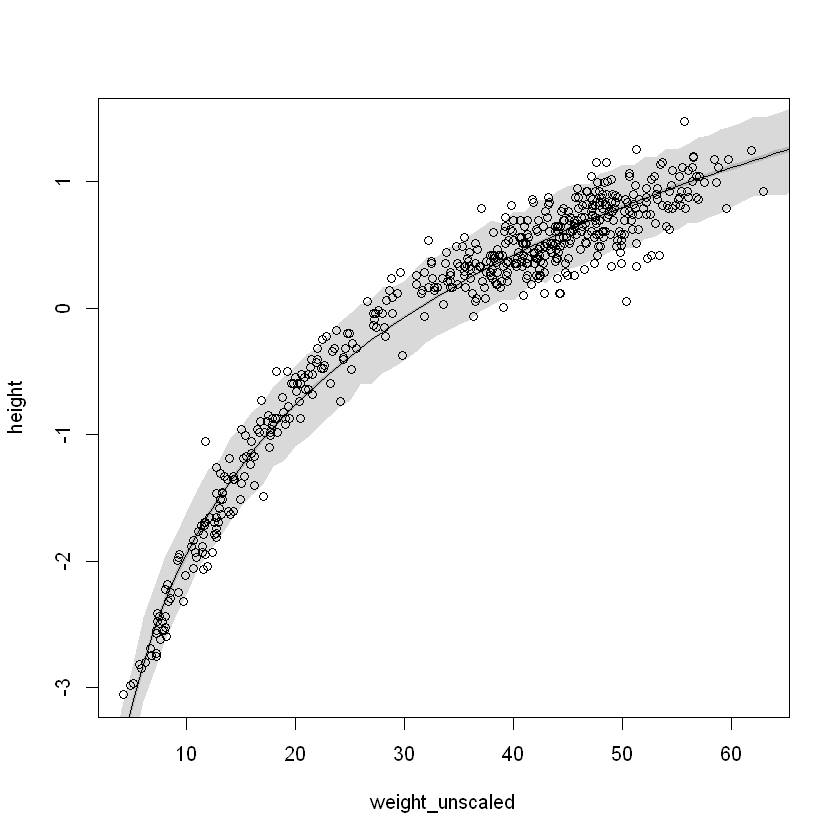

In [107]:
post3 <- extract.samples(model3)
mu_link3 <- function (weight_unscaled) post3$a + post3$b_weight * log(weight_unscaled)
weight_seq <- seq(from = 0, to = 100, by = 1)

plot(height ~ weight_unscaled, data = d)

mu <- sapply(weight_seq, mu_link3)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.92)

lines(weight_seq, mu_mean)
shade(mu_HPDI, weight_seq)

height_sim <- sim(model3, data = list(logweight = log(weight_seq)))
height_HPDI <- apply(height_sim, 2, HPDI, prob = 0.92)

shade(height_HPDI, weight_seq)

Inside the observed ragne we reproduce the data accuratly. Beyond that, there is a weight where above it there is not an expected increase in height that the model suggests comes with the increase in height. At that weight the height becomes in our oppinion unciorrelated with weiht, which we could represent in the model.

[ 1000 / 1000 ]


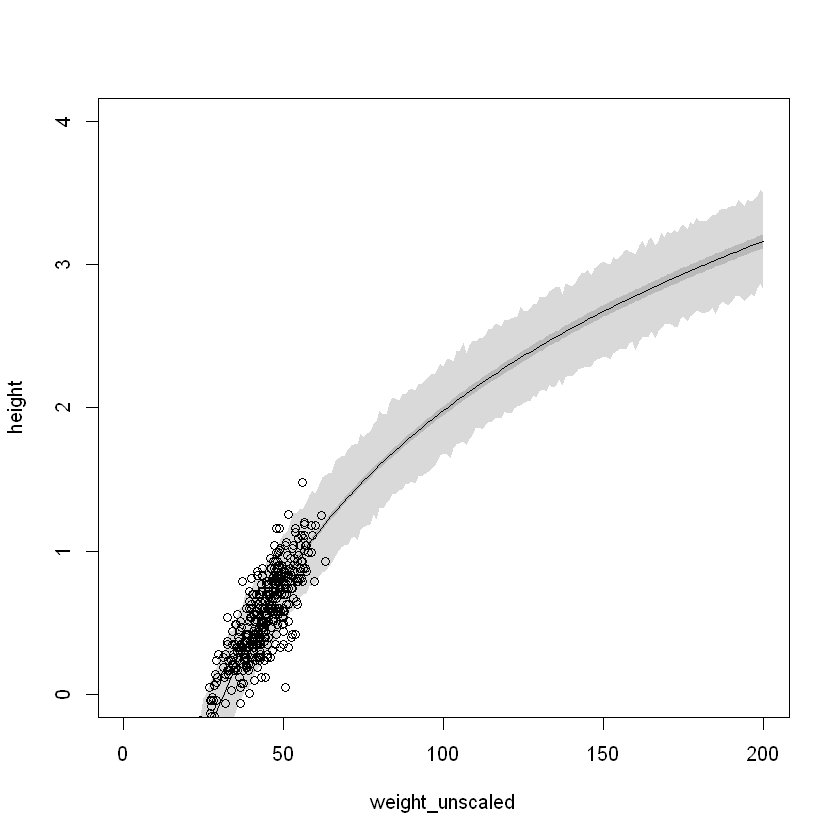

In [111]:
# A simple counterfactual plot can be created by increasing the weight range, e.g. going from 0 to 200 kg.
post3 <- extract.samples(model3)
mu_link3 <- function (weight_unscaled) post3$a + post3$b_weight * log(weight_unscaled)
weight_seq <- seq(from = 0, to = 200, by = 1)

plot(height ~ weight_unscaled, data = d, xlim = c(0, 200), ylim = c(0, 4))

mu <- sapply(weight_seq, mu_link3)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.92)

lines(weight_seq, mu_mean)
shade(mu_HPDI, weight_seq)

height_sim <- sim(model3, data = list(logweight = log(weight_seq)))
height_HPDI <- apply(height_sim, 2, HPDI, prob = 0.92)

shade(height_HPDI, weight_seq)